In [1]:
import pandas as pd
import cv2 


df = pd.read_csv("/Users/menghang/Downloads/YOLOX_outputs/yolox_l_mix_det/track_vis/2023_07_04_17_03_33.txt", names=["frame", "id", "x","y","w","h","score", "label", "x_center", "y_center", "color"])

In [2]:
ball = df[df["label"] == "sports ball"]

In [3]:
ball

,frame,id,x,y,w,h,score,label,x_center,y_center,color
20,0,21,722.68,953.65,21.63,22.02,0.73,sports ball,722,964,y.
64,2,23,720.27,966.66,22.43,22.81,0.72,sports ball,720,977,cyan.
132,5,26,714.13,998.12,24.61,25.29,0.77,sports ball,714,1010,cyan.
155,6,26,714.13,998.14,24.59,25.27,0.77,sports ball,714,1010,cyan.
198,8,27,705.23,1033.04,24.40,24.60,0.71,sports ball,705,1045,cyan.
...,...,...,...,...,...,...,...,...,...,...,...
18146,928,261,850.36,1251.58,25.34,28.26,0.78,sports ball,850,1265,y.
18167,929,261,850.91,1251.27,24.97,27.79,0.78,sports ball,850,1264,y.
18188,930,261,855.12,1249.71,23.36,25.93,0.79,sports ball,855,1261,y.
18209,931,261,856.28,1249.27,22.96,25.40,0.79,sports ball,856,1261,y.


In [4]:
ball["color"].value_counts()

y.         321
cyan.      192
g.          36
Name: color, dtype: int64

In [5]:
ball_possession = []

In [6]:
import numpy as np

def find_nearest_coordinate(point, coordinates):
    distances = np.linalg.norm(coordinates - point, axis=1)  # Calculate Euclidean distances
    nearest_index = np.argmin(distances)  # Find index of the minimum distance
    nearest_coordinate = coordinates[nearest_index]  # Get the nearest coordinate
    return nearest_coordinate, nearest_index

coordinates = np.array([[2, 4], [1, 3], [5, 6], [0, 1]])
point = np.array([3, 5])

nearest_coordinate , nearest_index = find_nearest_coordinate(point, coordinates)
print("Nearest Coordinate:", nearest_coordinate, nearest_index)

Nearest Coordinate: [2 4] 0


In [7]:
for i, row in ball.iterrows():
    frame = df[df["frame"] == row["frame"]]
    ball_center = [row["x_center"], row["y_center"]]   
    players_centers = []
    for j, f in frame.iterrows(): 
        if(f["label"] != "sports ball"):
         players_centers.append([f["x_center"], f["y_center"]])
    
    player, index = find_nearest_coordinate(np.array(ball_center), np.array(players_centers))
    b = frame.iloc[index]
    ball_possession.append(b["color"])
                          
                          
                                        

In [8]:
occrence = {"cyan.  " : 0, "r.  ":0 }
for i in ball_possession:
    occrence[i] += 1


In [9]:
import matplotlib
import PIL

from PIL import Image, ImageFont, ImageDraw
def possession_bar( frame: PIL.Image.Image, origin: tuple, home: float, away:float) -> PIL.Image.Image:
      
        bar_x = origin[0]
        bar_y = origin[1]
        bar_height = 29
        bar_width = 310

        ratio = home
        if ratio < 0.07:
            ratio = 0.07

        if ratio > 0.93:
            ratio = 0.93

        left_rectangle = (
            origin,
            [int(bar_x + ratio * bar_width), int(bar_y + bar_height)],
        )

        right_rectangle = (
            [int(bar_x + ratio * bar_width), bar_y],
            [int(bar_x + bar_width), int(bar_y + bar_height)],
        )

        left_color =  (108, 171, 221)
        right_color = (200, 16, 46)

        frame = draw_counter_rectangle(
            frame=frame,
            ratio=ratio,
            left_rectangle=left_rectangle,
            left_color=left_color,
            right_rectangle=right_rectangle,
            right_color=right_color,
        )

        # Draw home text
        if True:
            home_text = (
                f"{home}"
            )

            frame = text_in_middle_rectangle(
                img=frame,
                origin=left_rectangle[0],
                width=left_rectangle[1][0] - left_rectangle[0][0],
                height=left_rectangle[1][1] - left_rectangle[0][1],
                text=home_text,
                color=(0,0,0)
            )

        # Draw away text
        if True:
            away_text = (
                f"{away}"
            )

            frame = text_in_middle_rectangle(
                img=frame,
                origin=right_rectangle[0],
                width=right_rectangle[1][0] - right_rectangle[0][0],
                height=right_rectangle[1][1] - right_rectangle[0][1],
                text=away_text,
                color=(255,255,255)
            )

        return frame

def text_in_middle_rectangle(
        img: PIL.Image.Image,
        origin: tuple,
        width: int,
        height: int,
        text: str,
        font: PIL.ImageFont = None,
        color=(255, 255, 255),
    ) -> PIL.Image.Image:
        """
        Draw text in middle of rectangle

        Parameters
        ----------
        img : PIL.Image.Image
            Image
        origin : tuple
            Origin of the rectangle (x, y)
        width : int
            Width of the rectangle
        height : int
            Height of the rectangle
        text : str
            Text to draw
        font : PIL.ImageFont, optional
            Font to use, by default None
        color : tuple, optional
            Color of the text, by default (255, 255, 255)

        Returns
        -------
        PIL.Image.Image
            Image with the text drawn
        """

        draw = PIL.ImageDraw.Draw(img)

        if font is None:
            font = PIL.ImageFont.truetype("/Users/menghang/Desktop/ml-dev/football-server/forked_repo/soccer-video-analytics/fonts/Gidole-Regular.ttf", size=24)

        w, h = draw.textsize(text, font=font)
        text_origin = (
            origin[0] + width / 2 - w / 2,
            origin[1] + height / 2 - h / 2,
        )

        draw.text(text_origin, text, font=font, fill=color)

        return img
def draw_counter_rectangle(
        frame: PIL.Image.Image,
        ratio: float,
        left_rectangle: tuple,
        left_color: tuple,
        right_rectangle: tuple,
        right_color: tuple,
    ) -> PIL.Image.Image:
        """Draw counter rectangle for both teams

        Parameters
        ----------
        frame : PIL.Image.Image
            Video frame
        ratio : float
            counter proportion
        left_rectangle : tuple
            rectangle for the left team in counter
        left_color : tuple
            color for the left team in counter
        right_rectangle : tuple
            rectangle for the right team in counter
        right_color : tuple
            color for the right team in counter

        Returns
        -------
        PIL.Image.Image
            Drawed video frame
        """

        # Draw first one rectangle or another in orther to make the
        # rectangle bigger for better rounded corners

        if ratio < 0.15:
            left_rectangle[1][0] += 20

            frame = half_rounded_rectangle(
                frame,
                rectangle=left_rectangle,
                color=left_color,
                radius=15,
            )

            frame = half_rounded_rectangle(
                frame,
                rectangle=right_rectangle,
                color=right_color,
                left=True,
                radius=15,
            )
        else:
            right_rectangle[0][0] -= 20

            frame = half_rounded_rectangle(
                frame,
                rectangle=right_rectangle,
                color=right_color,
                left=True,
                radius=15,
            )

            frame = half_rounded_rectangle(
                frame,
                rectangle=left_rectangle,
                color=left_color,
                radius=15,
            )

        return frame
def half_rounded_rectangle(
        img: PIL.Image.Image,
        rectangle: tuple,
        color: tuple,
        radius: int = 15,
        left: bool = False,
    ) -> PIL.Image.Image:
       
        overlay = img.copy()
        draw = PIL.ImageDraw.Draw(overlay, "RGBA")
        draw.rounded_rectangle(rectangle, radius, fill=color)

        height = rectangle[1][1] - rectangle[0][1]
        stop_width = 13

        if left:
            draw.rectangle(
                (
                    rectangle[0][0] + 0,
                    rectangle[1][1] - height,
                    rectangle[0][0] + stop_width,
                    rectangle[1][1],
                ),
                fill=color,
            )
        else:
            draw.rectangle(
                (
                    rectangle[1][0] - stop_width,
                    rectangle[1][1] - height,
                    rectangle[1][0],
                    rectangle[1][1],
                ),
                fill=color,
            )
        return overlay

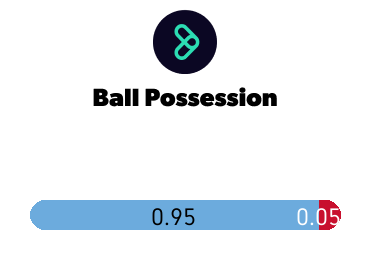

In [10]:
from PIL import Image, ImageFont

img = Image.open("/Users/menghang/Desktop/ml-dev/football-server/forked_repo/soccer-video-analytics/images/possession_board.png")

possession_bar(img, (30,200), 0.95,0.05)

In [21]:
cap = cv2.VideoCapture("/Users/menghang/Downloads/YOLOX_outputs/yolox_l_mix_det/track_vis/2023_07_04_17_03_33/a.mov")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # float
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) ) # float
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)


out = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))

ball_frame = list(ball["frame"])

frame_count = 0

print(len(ball_possession))

ball_found = 0

possession = {"cyan.  " : 0, "r.  ":0 }

possesion_board =  Image.open("/Users/menghang/Desktop/ml-dev/football-server/forked_repo/soccer-video-analytics/images/possession_board.png")

while True:     
    success, frame = cap.read()
    if success:
        if frame_count in ball_frame: 
            ball_found += 1

            possession[ball_possession[ball_found-1] ] += 1 
            home = round(possession["cyan.  "] / ball_found, 2)    
            board = np.array( possession_bar(possesion_board, (30,200), home , round(1 - home,2)))
            board = cv2.cvtColor(board,  cv2.COLOR_RGB2BGR)
            print(ball_found)

        

        frame_count += 1
        board = cv2.resize(board, (800,600))
        frame[2200 : 2200 + board.shape[0], 1700 : 1700 + board.shape[1]] = board
        out.write(frame)

    
    else:
        break
out.release()

cap.release()
cv2.destroyAllWindows()


549
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
